In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os


# Nominal scenario - Comparison between controllers

In [2]:
# Load summary stats
summary_pid = pd.read_csv("simulation_results/statistics/results_pid_nominal_aggregated.csv")
summary_onoff = pd.read_csv("simulation_results/statistics/results_onoff_nominal_aggregated.csv")
summary_fuzzy = pd.read_csv("simulation_results/statistics/results_fuzzy_nominal_aggregated.csv")

summary_pid['source'] = 'PID'
summary_onoff['source'] = 'ON/OFF'
summary_fuzzy['source'] = 'Fuzzy'

summary_stats = pd.concat([summary_pid, summary_onoff, summary_fuzzy])

# Load per-run results
results_pid = pd.read_csv("simulation_results/statistics/results_pid_nominal_all.csv" )
results_onoff = pd.read_csv("simulation_results/statistics/results_onoff_nominal_all.csv")
results_fuzzy = pd.read_csv("simulation_results/statistics/results_fuzzy_nominal_all.csv")

# Label sources (if not consistent already)
results_pid['controller'] = 'PID'
results_onoff['controller'] = 'ON/OFF'
results_fuzzy['controller'] = 'Fuzzy'

results = pd.concat([results_pid, results_onoff, results_fuzzy])

palette = {'PID': 'skyblue', 'ON/OFF': 'salmon', 'Fuzzy': 'lightgreen'}

In [3]:

def boxplot_of_metrics(results, summary_stats, palette):
    """
    Draws boxplots for each metric in the results DataFrame,
    overlaying mean and confidence intervals from summary_stats.
    """
    metrics = results['metric'].unique()

    for metric in metrics:
        plt.figure(figsize=(10, 6))

        # Filter data
        metric_results = results[results['metric'] == metric]
        metric_results_clean = metric_results.dropna(subset=['value'])
        print(metric_results_clean.head())
        metric_summary = summary_stats[summary_stats['metric'] == metric]

        # Draw boxplot
        ax = sns.boxplot(
            data=metric_results_clean,
            x='controller', y='value',
            palette=palette,
            hue='controller',
            showmeans=False
        )

        # Add mean + CI overlay
        for i, row in metric_summary.iterrows():
            x_pos = ['PID', 'ON/OFF', 'Fuzzy'].index(row['source'])

            # Mean as black dot
            ax.plot(x_pos, row['mean'], 'o', color='black')

            # CI for mean
            ax.errorbar(x=x_pos, y=row['mean'],
                       yerr=[[row['mean'] - row['mean_ci_lower']], [row['mean_ci_upper'] - row['mean']]],
                        fmt='none', ecolor='black', capsize=5, lw=2)

        plt.title(f"{metric} — Boxplot with Mean and CI")
        plt.xlabel("Controller")
        plt.ylabel(metric)
        plt.show()


  controller  run              metric     value
0        PID    0  steady_state_error  0.040790
1        PID    1  steady_state_error  0.051176
2        PID    2  steady_state_error -0.150232
3        PID    3  steady_state_error -0.039437
4        PID    4  steady_state_error -0.143795


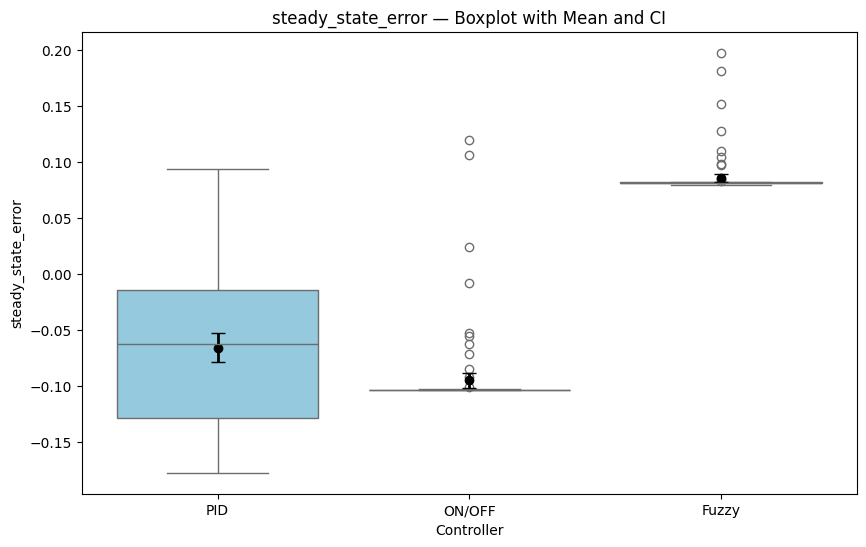

    controller  run             metric     value
100        PID    0  mean_square_error  0.262003
101        PID    1  mean_square_error  0.249387
102        PID    2  mean_square_error  0.325730
103        PID    3  mean_square_error  0.289868
104        PID    4  mean_square_error  0.326327


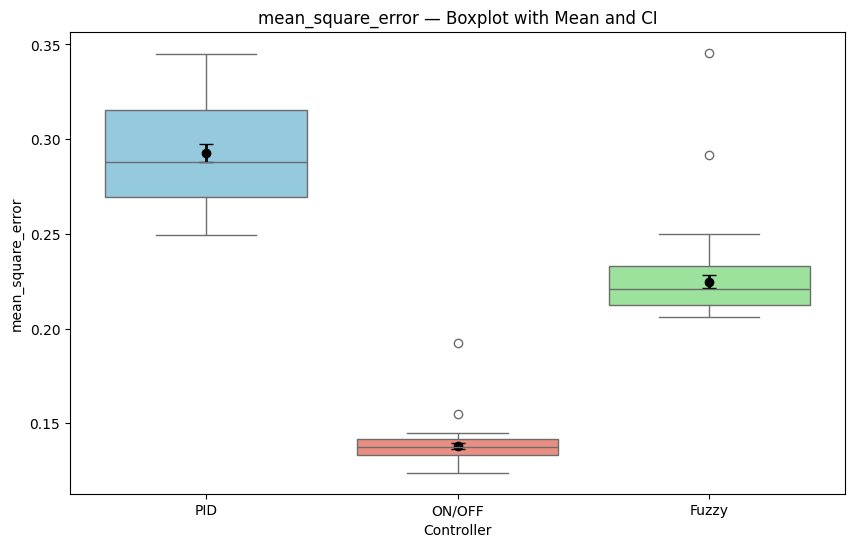

    controller  run     metric     value
200        PID    0  overshoot  0.141923
201        PID    1  overshoot  0.142629
202        PID    2  overshoot -0.069994
203        PID    3  overshoot  0.061927
204        PID    4  overshoot -0.047508


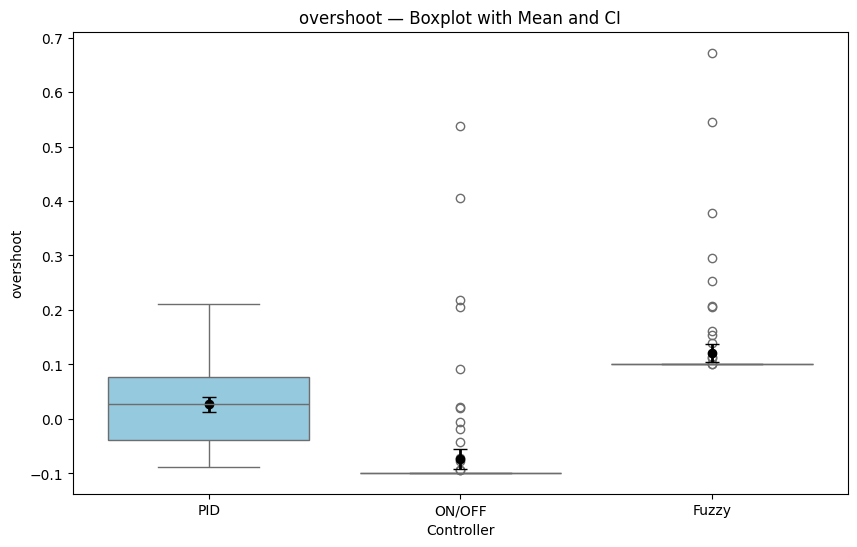

    controller  run     metric   value
300        PID    0  rise_time  3201.0
301        PID    1  rise_time  2973.0
302        PID    2  rise_time  4602.0
303        PID    3  rise_time  3864.0
304        PID    4  rise_time  4651.0


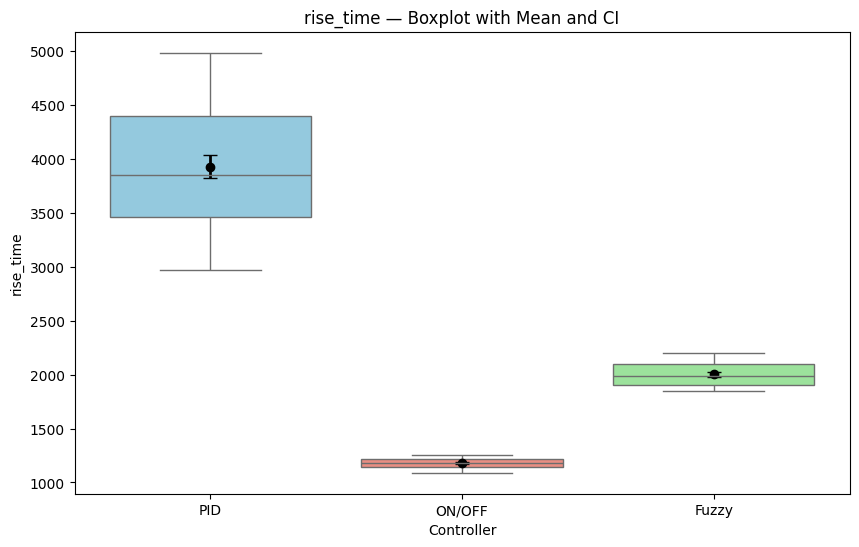

    controller  run         metric   value
400        PID    0  settling_time  2463.0
401        PID    1  settling_time  2315.0
402        PID    2  settling_time  3256.0
403        PID    3  settling_time  2877.0
404        PID    4  settling_time  3278.0


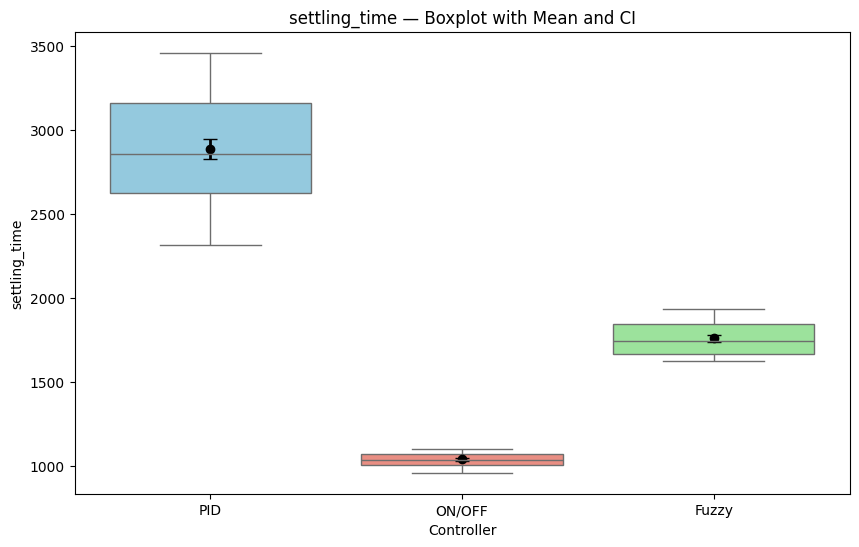

    controller  run        metric    value
500        PID    0  comfort_time  11938.0
501        PID    1  comfort_time  12086.0
502        PID    2  comfort_time  11145.0
503        PID    3  comfort_time  11524.0
504        PID    4  comfort_time  11123.0


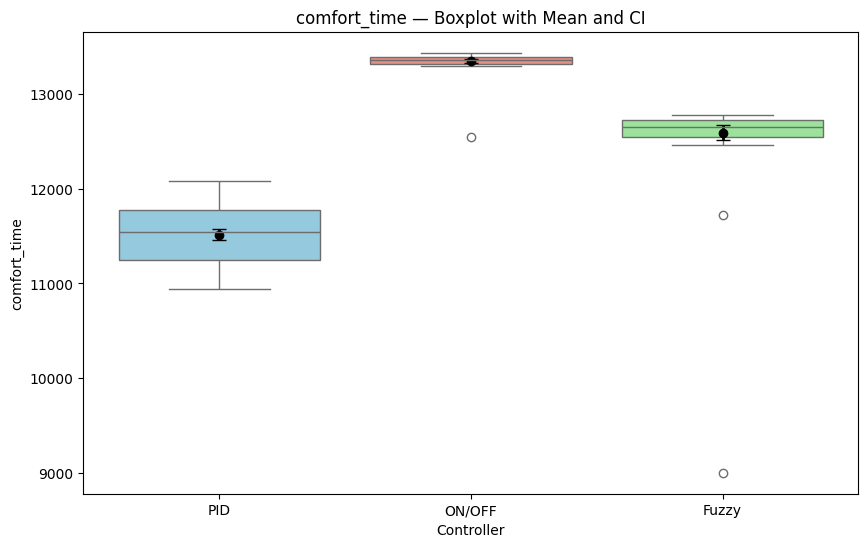

    controller  run           metric     value
600        PID    0  energy_consumed  0.526569
601        PID    1  energy_consumed  0.470041
602        PID    2  energy_consumed  1.040254
603        PID    3  energy_consumed  0.768639
604        PID    4  energy_consumed  1.032549


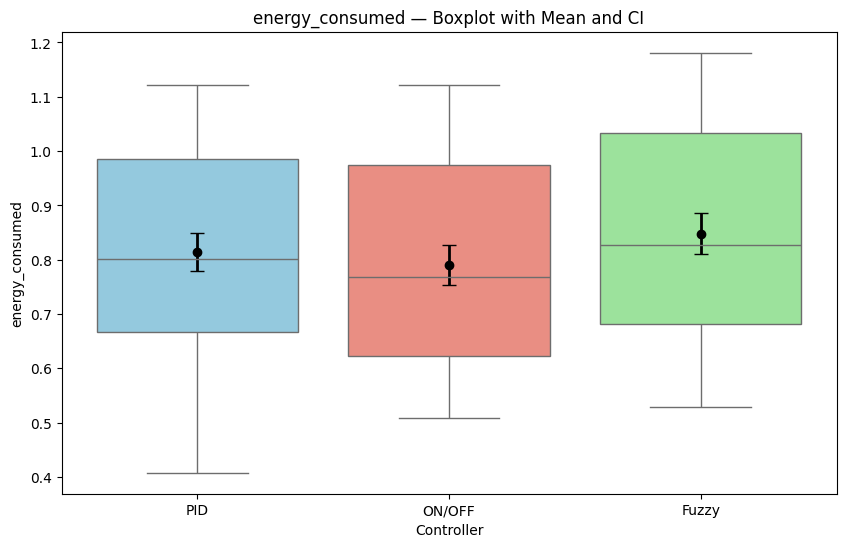

    controller  run                   metric     value
700        PID    0  variance_after_settling  0.023198
701        PID    1  variance_after_settling  0.021061
702        PID    2  variance_after_settling  0.011315
703        PID    3  variance_after_settling  0.019814
704        PID    4  variance_after_settling  0.012587


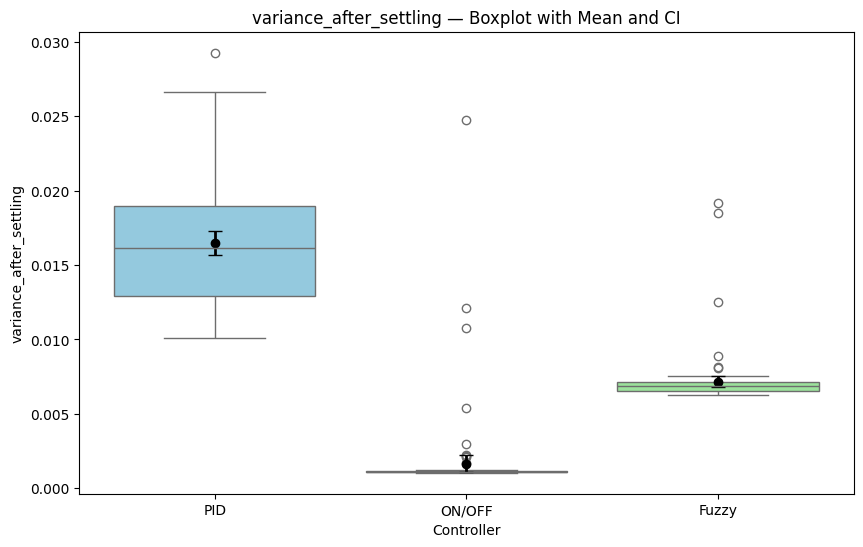

Empty DataFrame
Columns: [controller, run, metric, value]
Index: []


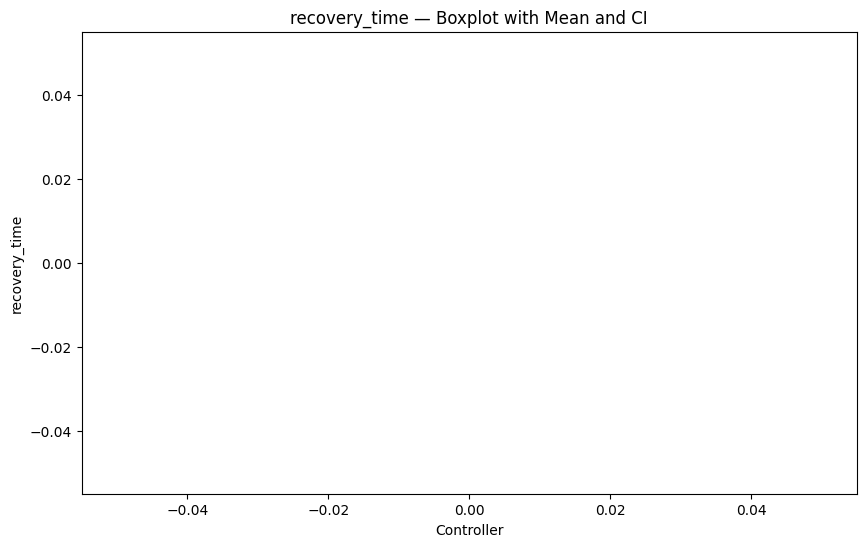

    controller  run                  metric  value
900        PID    0  number_of_oscillations    1.0
901        PID    1  number_of_oscillations    1.0
902        PID    2  number_of_oscillations    0.0
903        PID    3  number_of_oscillations    1.0
904        PID    4  number_of_oscillations    0.0


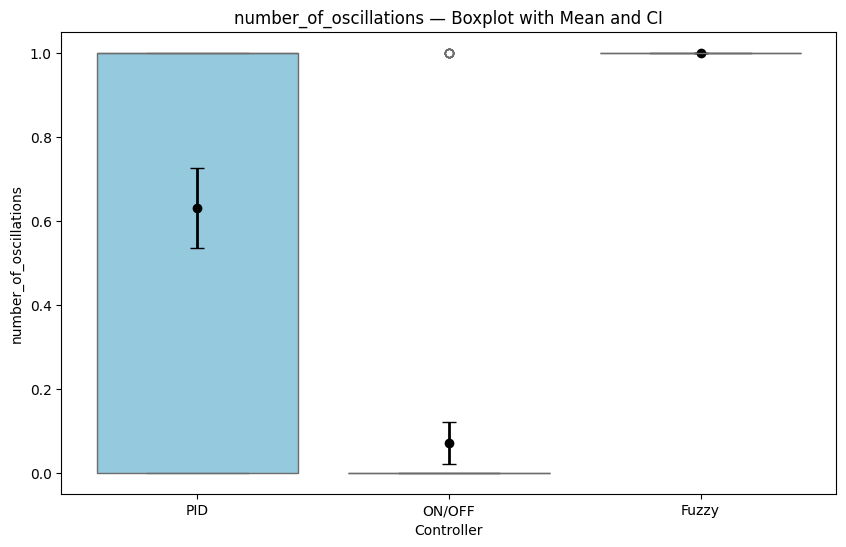

In [4]:
boxplot_of_metrics(results, summary_stats, palette)

# Noise scenario - Comparison between controllers

In [5]:
# Load summary stats
summary_pid = pd.read_csv("simulation_results/statistics/results_pid_with_noise_aggregated.csv")
summary_onoff = pd.read_csv("simulation_results/statistics/results_onoff_with_noise_aggregated.csv")
summary_fuzzy = pd.read_csv("simulation_results/statistics/results_fuzzy_with_noise_aggregated.csv")

summary_pid['source'] = 'PID'
summary_onoff['source'] = 'ON/OFF'
summary_fuzzy['source'] = 'Fuzzy'

summary_stats_noise = pd.concat([summary_pid, summary_onoff, summary_fuzzy])

# Load per-run results
results_pid = pd.read_csv("simulation_results/statistics/results_pid_with_noise_all.csv" )
results_onoff = pd.read_csv("simulation_results/statistics/results_onoff_with_noise_all.csv")
results_fuzzy = pd.read_csv("simulation_results/statistics/results_fuzzy_with_noise_all.csv")

# Label sources (if not consistent already)
results_pid['controller'] = 'PID'
results_onoff['controller'] = 'ON/OFF'
results_fuzzy['controller'] = 'Fuzzy'

results_noise = pd.concat([results_pid, results_onoff, results_fuzzy])


  controller  run              metric     value
0        PID    0  steady_state_error  0.039497
1        PID    1  steady_state_error  0.049837
2        PID    2  steady_state_error -0.151806
3        PID    3  steady_state_error -0.040621
4        PID    4  steady_state_error -0.145404


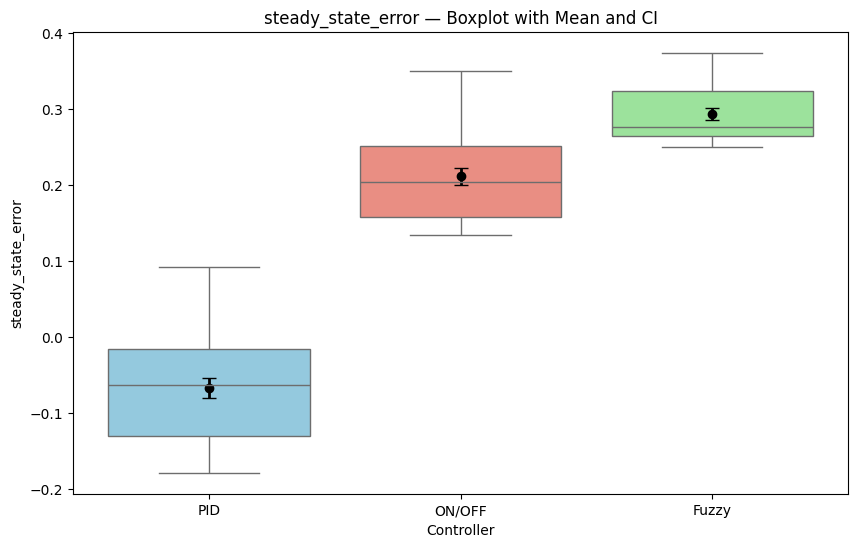

    controller  run             metric     value
100        PID    0  mean_square_error  0.261564
101        PID    1  mean_square_error  0.248909
102        PID    2  mean_square_error  0.325858
103        PID    3  mean_square_error  0.289676
104        PID    4  mean_square_error  0.326443


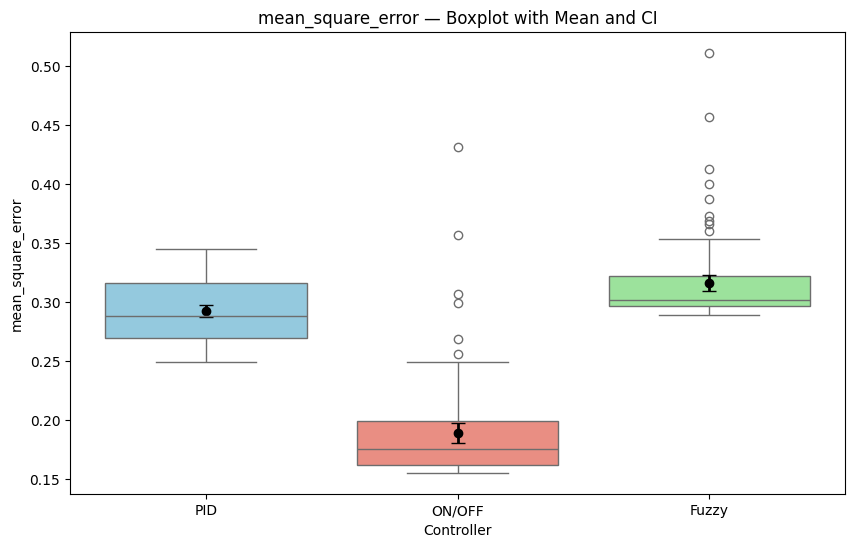

    controller  run     metric     value
200        PID    0  overshoot  0.142684
201        PID    1  overshoot  0.143376
202        PID    2  overshoot -0.068558
203        PID    3  overshoot  0.063496
204        PID    4  overshoot -0.047378


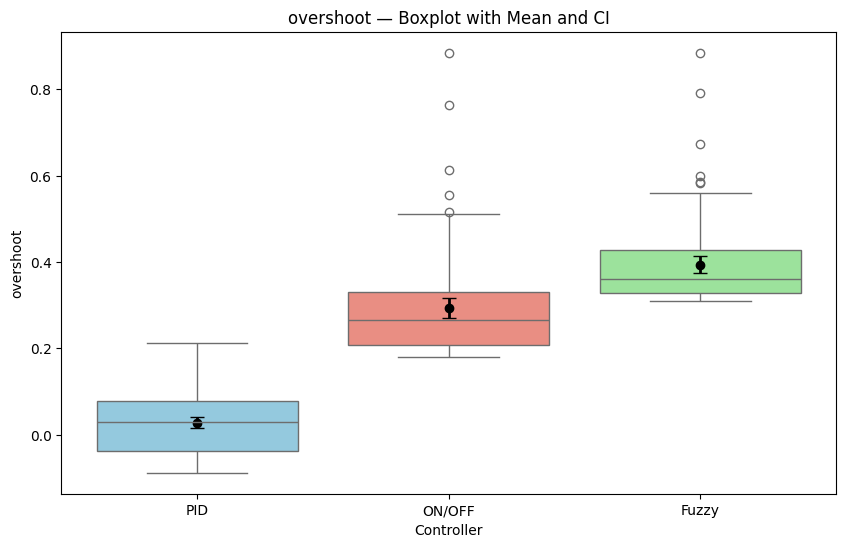

    controller  run     metric   value
300        PID    0  rise_time  3203.0
301        PID    1  rise_time  2977.0
302        PID    2  rise_time  4608.0
303        PID    3  rise_time  3872.0
304        PID    4  rise_time  4652.0


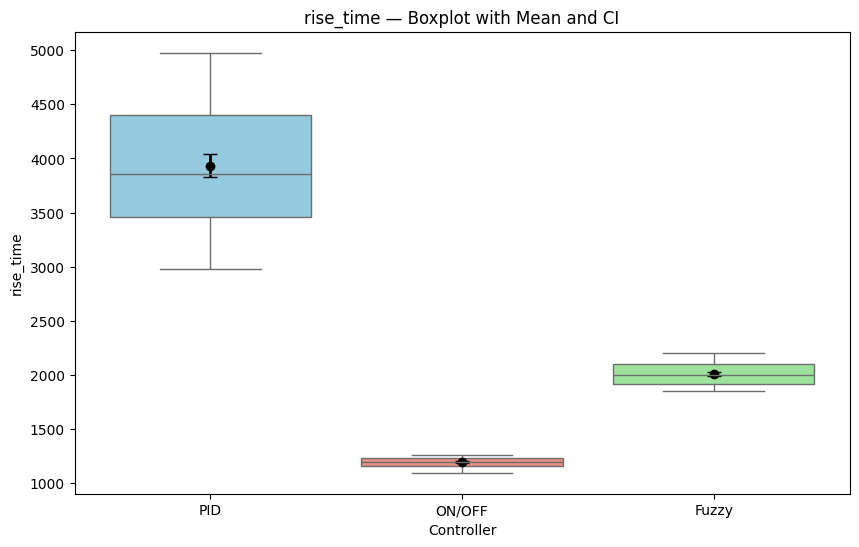

    controller  run         metric   value
400        PID    0  settling_time  2469.0
401        PID    1  settling_time  2320.0
402        PID    2  settling_time  3256.0
403        PID    3  settling_time  2886.0
404        PID    4  settling_time  3277.0


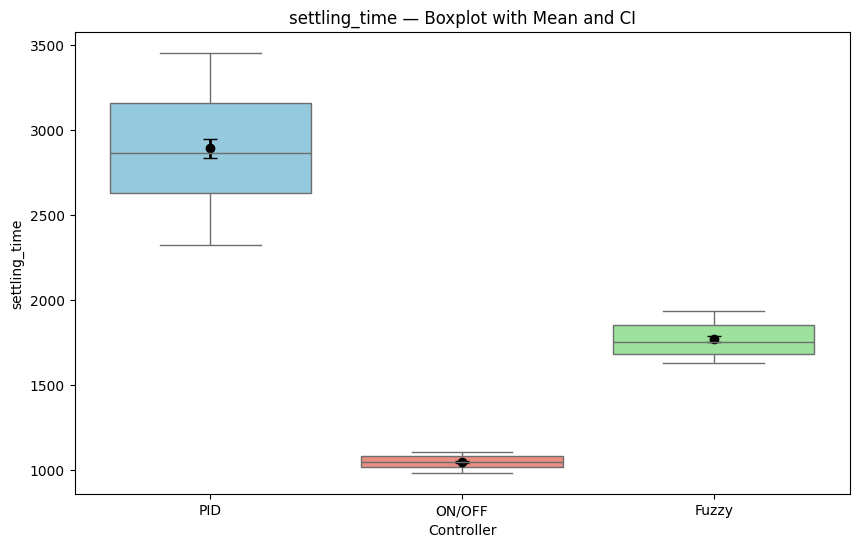

    controller  run        metric    value
500        PID    0  comfort_time  11932.0
501        PID    1  comfort_time  12081.0
502        PID    2  comfort_time  11145.0
503        PID    3  comfort_time  11515.0
504        PID    4  comfort_time  11124.0


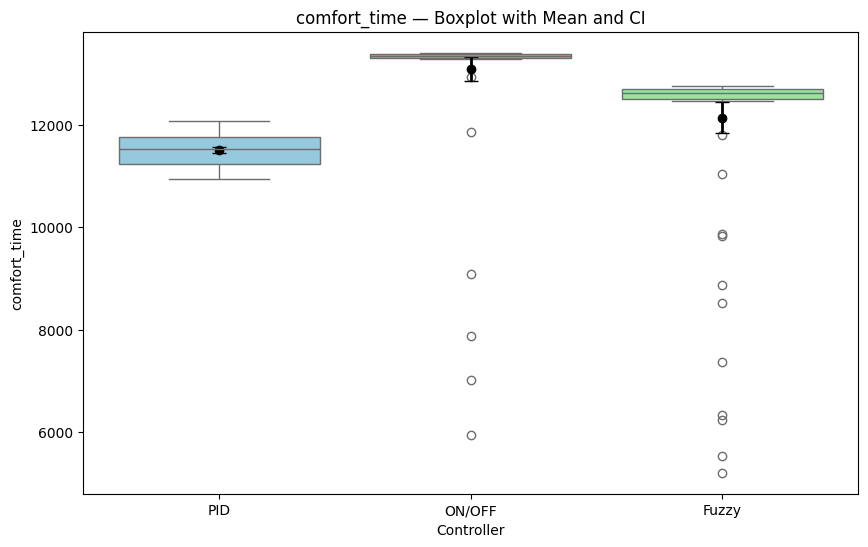

    controller  run           metric     value
600        PID    0  energy_consumed  0.526545
601        PID    1  energy_consumed  0.470017
602        PID    2  energy_consumed  1.040229
603        PID    3  energy_consumed  0.768615
604        PID    4  energy_consumed  1.032524


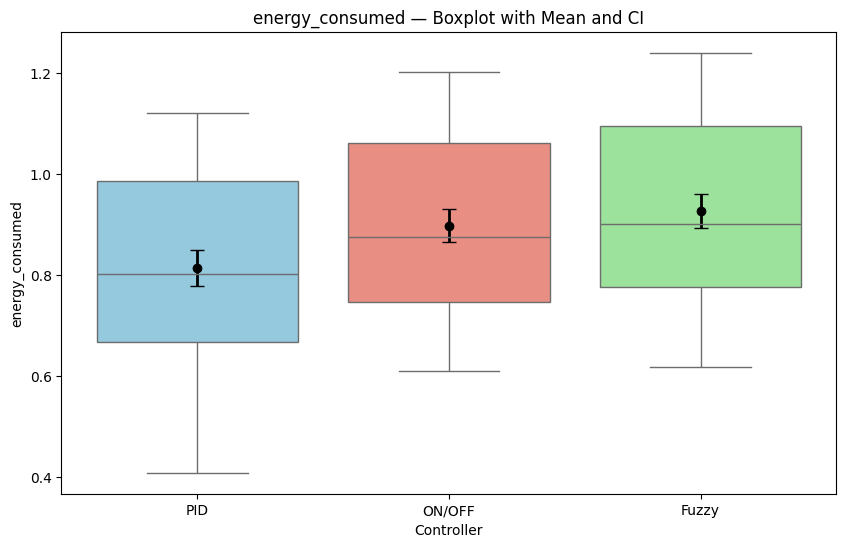

    controller  run                   metric     value
700        PID    0  variance_after_settling  0.022982
701        PID    1  variance_after_settling  0.020868
702        PID    2  variance_after_settling  0.011244
703        PID    3  variance_after_settling  0.019561
704        PID    4  variance_after_settling  0.012531


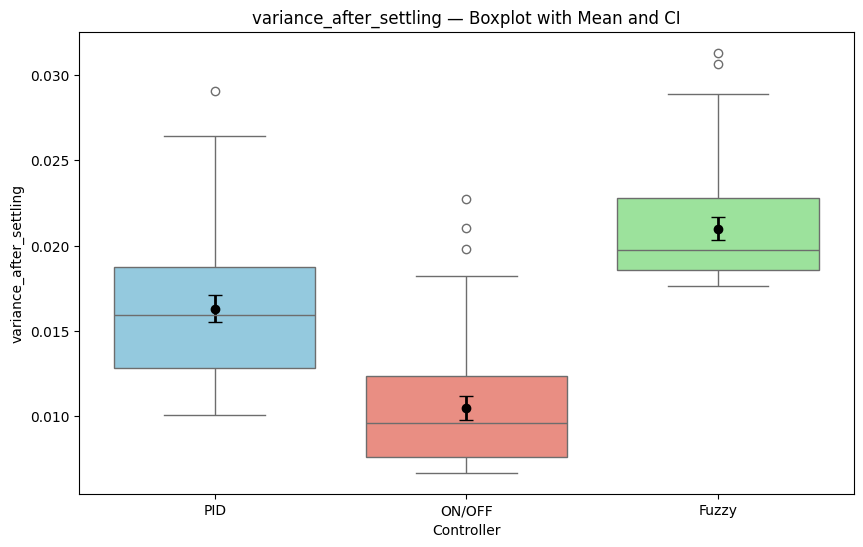

Empty DataFrame
Columns: [controller, run, metric, value]
Index: []


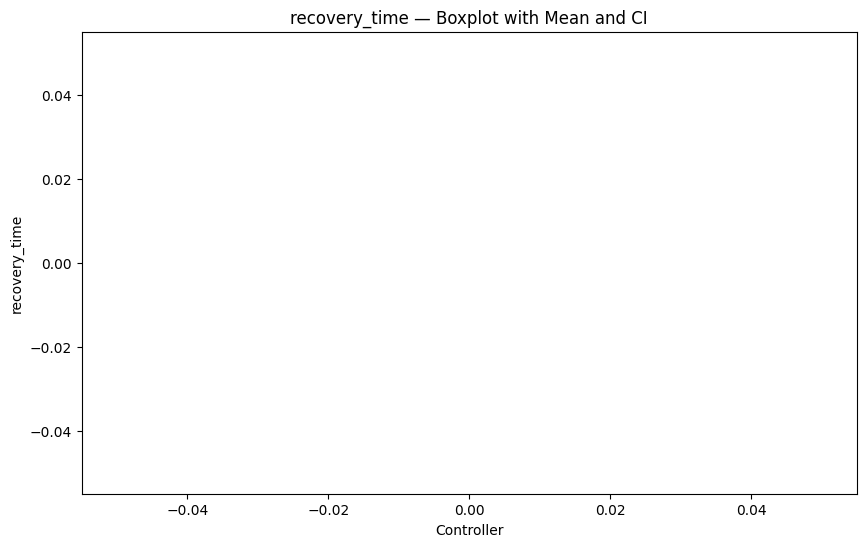

    controller  run                  metric  value
900        PID    0  number_of_oscillations    3.0
901        PID    1  number_of_oscillations    1.0
902        PID    2  number_of_oscillations    0.0
903        PID    3  number_of_oscillations    1.0
904        PID    4  number_of_oscillations    0.0


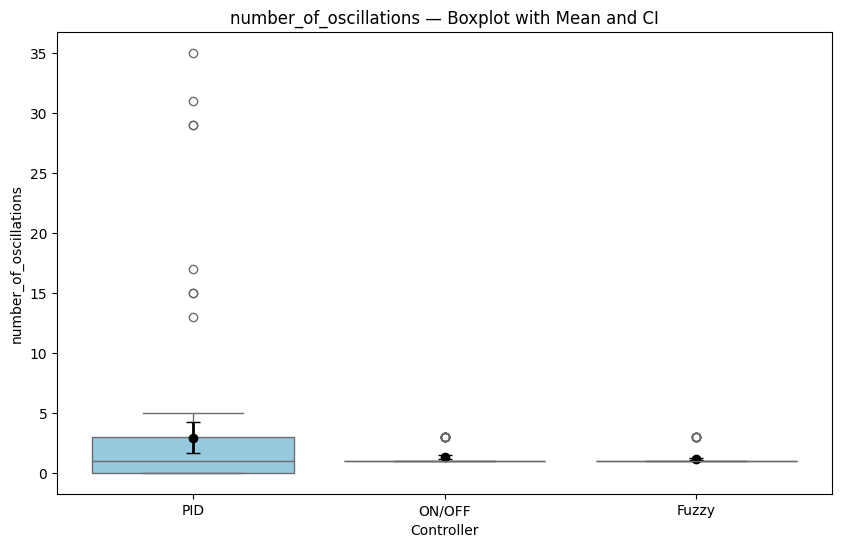

In [6]:
boxplot_of_metrics(results_noise, summary_stats_noise, palette)

# Disturbances scenario 

In [7]:
# Load summary stats
summary_pid = pd.read_csv("simulation_results/statistics/results_pid_with_disturbances_aggregated.csv")
summary_onoff = pd.read_csv("simulation_results/statistics/results_onoff_with_disturbances_aggregated.csv")
summary_fuzzy = pd.read_csv("simulation_results/statistics/results_fuzzy_with_disturbances_aggregated.csv")

summary_pid['source'] = 'PID'
summary_onoff['source'] = 'ON/OFF'
summary_fuzzy['source'] = 'Fuzzy'

summary_stats_disturbances_ = pd.concat([summary_pid, summary_onoff, summary_fuzzy])

# Load per-run results
results_pid = pd.read_csv("simulation_results/statistics/results_pid_with_disturbances_all.csv" )
results_onoff = pd.read_csv("simulation_results/statistics/results_onoff_with_disturbances_all.csv")
results_fuzzy = pd.read_csv("simulation_results/statistics/results_fuzzy_with_disturbances_all.csv")

# Label sources (if not consistent already)
results_pid['controller'] = 'PID'
results_onoff['controller'] = 'ON/OFF'
results_fuzzy['controller'] = 'Fuzzy'

results_disturbances_ = pd.concat([results_pid, results_onoff, results_fuzzy])


  controller  run              metric     value
0        PID    0  steady_state_error  0.047701
1        PID    1  steady_state_error  0.054851
4        PID    4  steady_state_error -0.166168
5        PID    5  steady_state_error  0.054826
6        PID    6  steady_state_error  0.063199


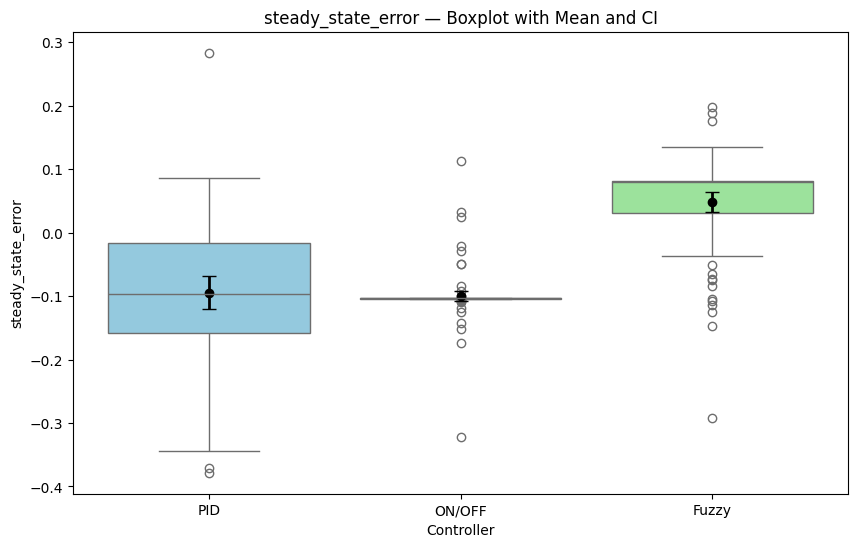

    controller  run             metric     value
100        PID    0  mean_square_error  0.258212
101        PID    1  mean_square_error  0.250213
102        PID    2  mean_square_error  3.494284
103        PID    3  mean_square_error  0.503713
104        PID    4  mean_square_error  0.330094


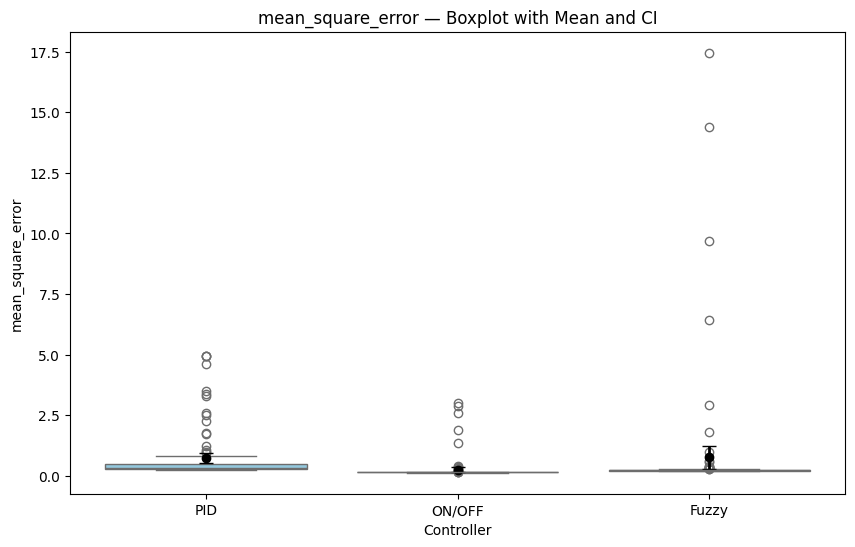

    controller  run     metric     value
200        PID    0  overshoot  0.192421
201        PID    1  overshoot  0.154741
202        PID    2  overshoot -0.520486
203        PID    3  overshoot -0.100295
204        PID    4  overshoot -0.060784


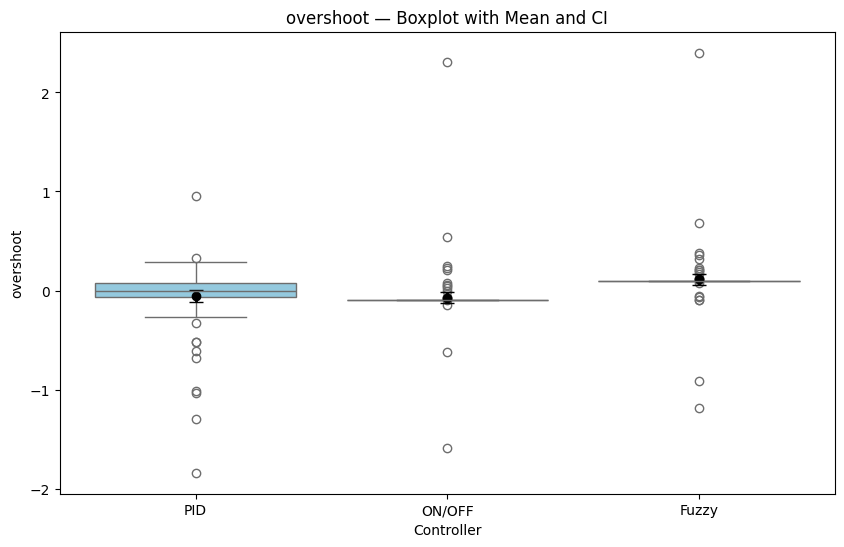

    controller  run     metric   value
300        PID    0  rise_time  3103.0
301        PID    1  rise_time  2973.0
303        PID    3  rise_time  4011.0
304        PID    4  rise_time  4651.0
305        PID    5  rise_time  3249.0


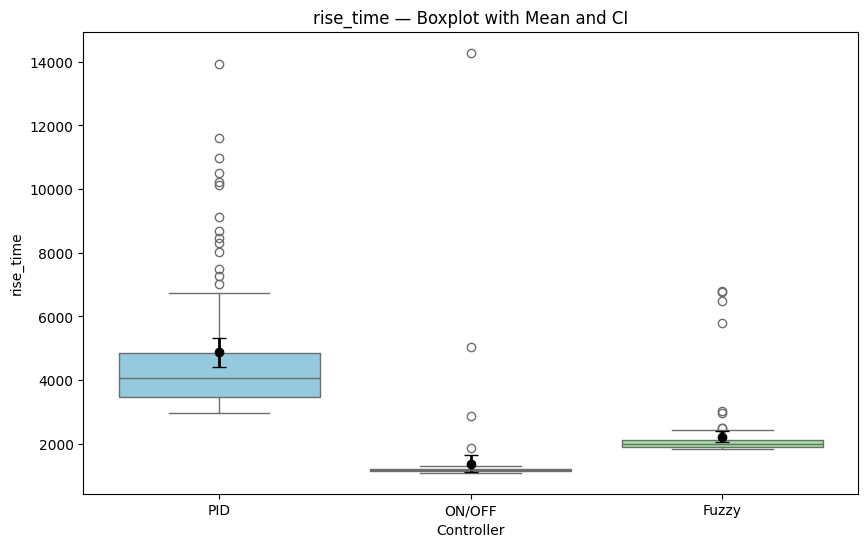

    controller  run         metric   value
400        PID    0  settling_time  2398.0
401        PID    1  settling_time  2315.0
404        PID    4  settling_time  3278.0
405        PID    5  settling_time  2495.0
406        PID    6  settling_time  8578.0


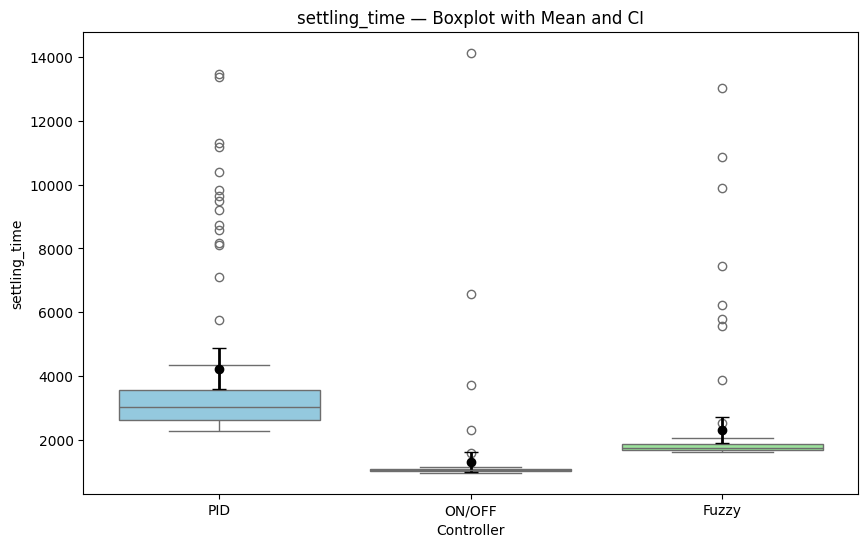

    controller  run        metric    value
500        PID    0  comfort_time  12003.0
501        PID    1  comfort_time  12086.0
502        PID    2  comfort_time      0.0
503        PID    3  comfort_time   3931.0
504        PID    4  comfort_time  11123.0


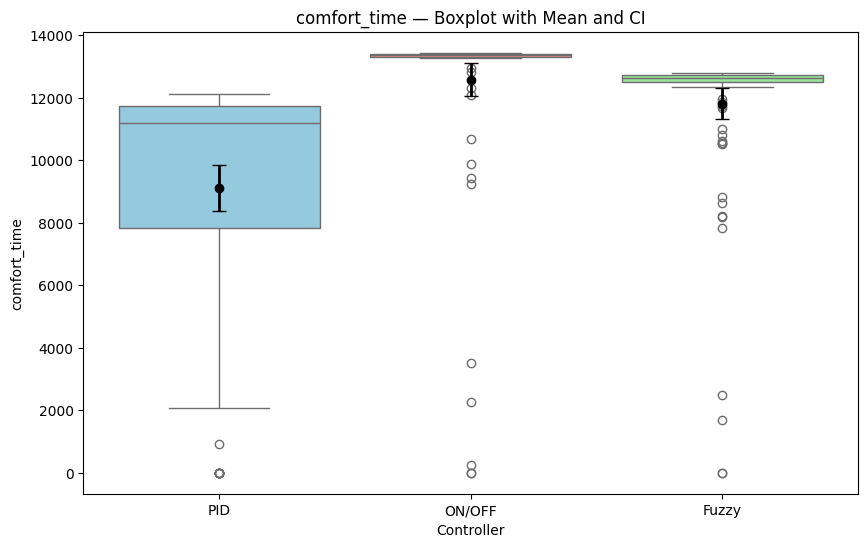

    controller  run           metric     value
600        PID    0  energy_consumed  0.499934
601        PID    1  energy_consumed  0.463333
602        PID    2  energy_consumed  4.493837
603        PID    3  energy_consumed  1.638421
604        PID    4  energy_consumed  1.068461


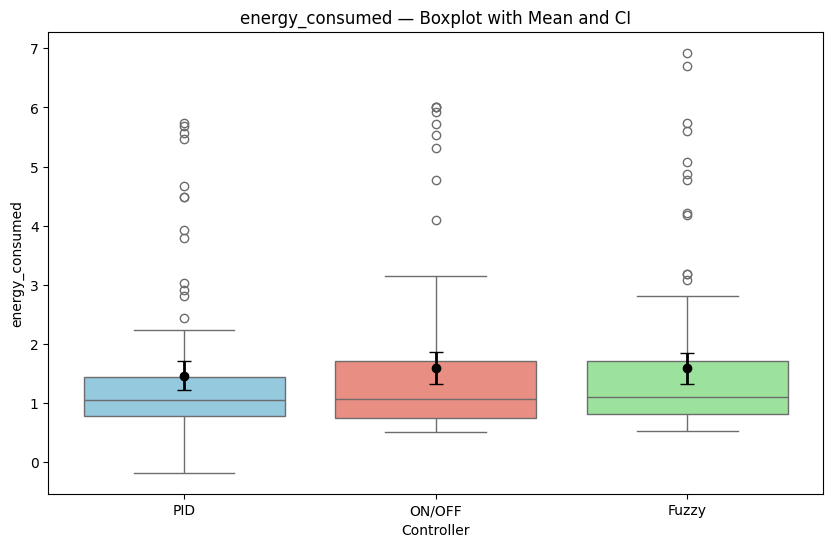

    controller  run                   metric     value
700        PID    0  variance_after_settling  0.022762
701        PID    1  variance_after_settling  0.021656
704        PID    4  variance_after_settling  0.010529
705        PID    5  variance_after_settling  0.025280
706        PID    6  variance_after_settling  0.046099


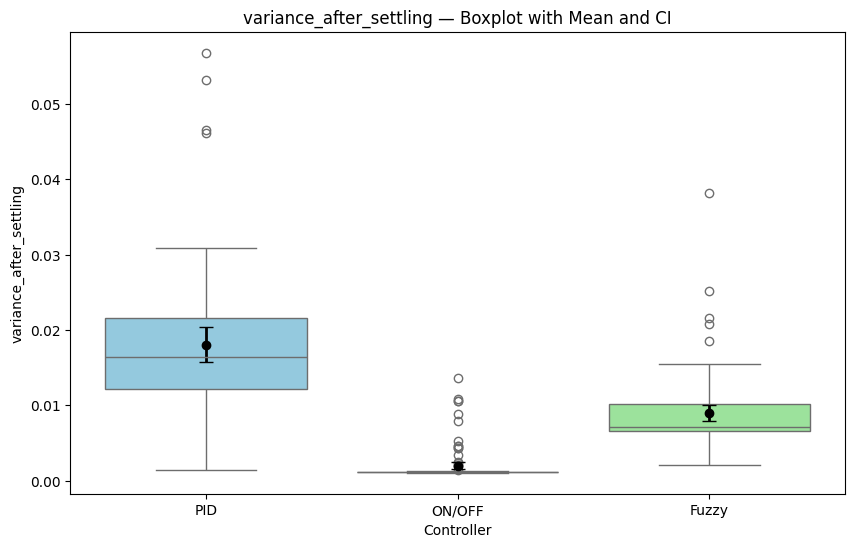

    controller  run         metric   value
800        PID    0  recovery_time  1301.0
801        PID    1  recovery_time     0.0
803        PID    3  recovery_time   415.0
804        PID    4  recovery_time     0.0
806        PID    6  recovery_time  7606.0


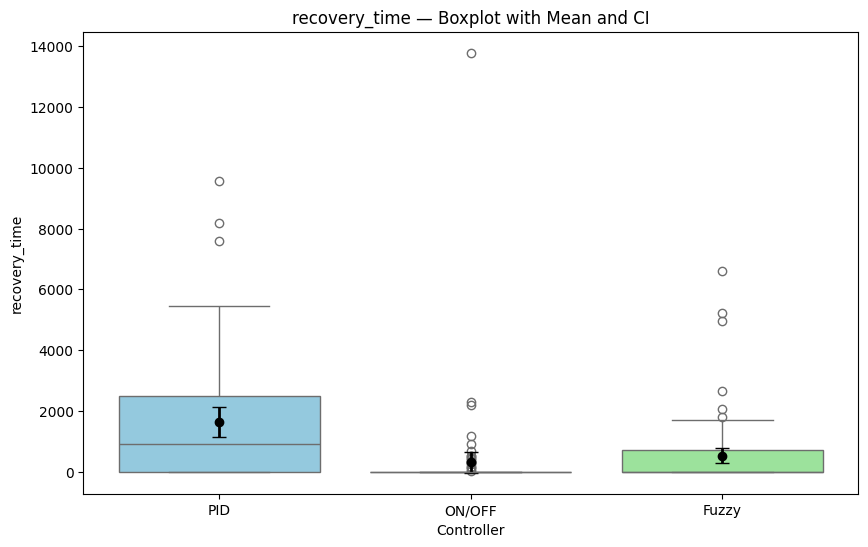

    controller  run                  metric  value
900        PID    0  number_of_oscillations    1.0
901        PID    1  number_of_oscillations    1.0
902        PID    2  number_of_oscillations    0.0
903        PID    3  number_of_oscillations    0.0
904        PID    4  number_of_oscillations    0.0


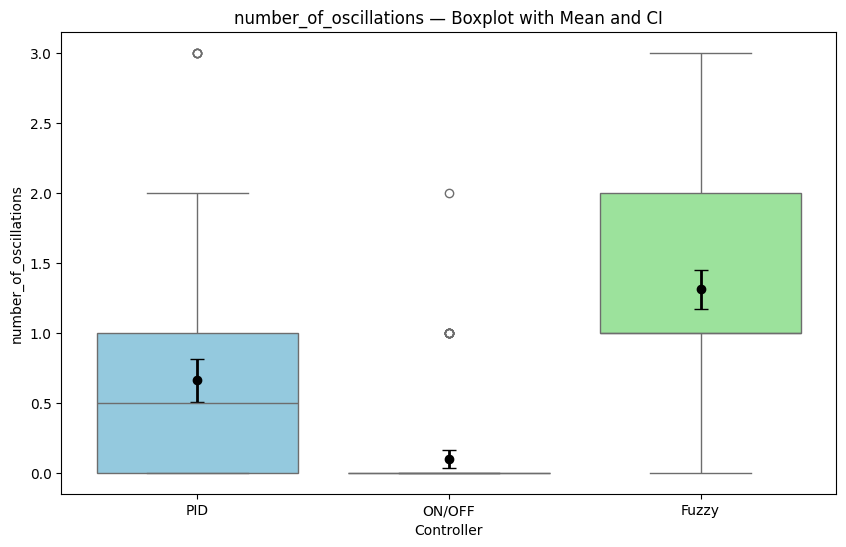

In [8]:

boxplot_of_metrics(results_disturbances_, summary_stats_disturbances_, palette)